---
# Part 2 of Practical Stats for Data Scientists, reworked for Python
---

This notebook assumes that the datasets referenced in Stats4DS.ipynb have been loaded.

The notebook picks up at Chapter 5 Logistics Regression

---
## Introduction

### Imports 

In [1]:
%matplotlib inline

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sklearn.linear_model

### Dataset Load

In [7]:
loans_df = pd.read_csv('data/loan_data.csv', index_col=0)

In [8]:
loans_df.head()

,status,loan_amnt,term,annual_inc,dti,payment_inc_ratio,revol_bal,revol_util,purpose,home_ownership,delinq_2yrs_zero,pub_rec_zero,open_acc,grade,outcome,emp_length,purpose_,home_,emp_len_,borrower_score
1,Charged Off,2500,60 months,30000,1.00,2.39320,1687,9.4,car,RENT,1,1,3,4.8,default,1,major_purchase,RENT,> 1 Year,0.65
2,Charged Off,5600,60 months,40000,5.55,4.57170,5210,32.6,small_business,OWN,1,1,11,1.4,default,5,small_business,OWN,> 1 Year,0.80
3,Charged Off,5375,60 months,15000,18.08,9.71600,9279,36.5,other,RENT,1,1,2,6.0,default,1,other,RENT,> 1 Year,0.60
4,Charged Off,9000,36 months,30000,10.08,12.21520,10452,91.7,debt_consolidation,RENT,1,1,4,4.2,default,1,debt_consolidation,RENT,> 1 Year,0.50
5,Charged Off,10000,36 months,100000,7.06,3.90888,11997,55.5,other,RENT,1,1,14,5.4,default,4,other,RENT,> 1 Year,0.55


In [6]:
loans_df.shape

(45342, 21)

In [9]:
pd.unique(loans_df['outcome'])

array(['default', 'paid off'], dtype=object)

In [12]:
loans_df['outcome'].describe()

count        45342
unique           2
top       paid off
freq         22671
Name: outcome, dtype: object

---
## Work through simple example of logistic regression

taken from https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8


Dataset description is at https://archive.ics.uci.edu/ml/datasets/bank+marketing#

In [14]:
bank_df = pd.read_csv('data/banking.csv')

In [17]:
bank_df.describe()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [18]:
bank_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [38]:
bank_df.iloc[0]

age                        44
job               blue-collar
marital               married
education               basic
default               unknown
housing                   yes
loan                       no
contact              cellular
month                     aug
day_of_week               thu
duration                  210
campaign                    1
pdays                     999
previous                    0
poutcome          nonexistent
emp_var_rate              1.4
cons_price_idx         93.444
cons_conf_idx           -36.1
euribor3m               4.963
nr_employed            5228.1
y                           0
Name: 0, dtype: object

In [32]:
bank_df.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'], dtype=object)

In [19]:
bank_df['education'].unique()

array(['basic.4y', 'unknown', 'university.degree', 'high.school',
       'basic.9y', 'professional.course', 'basic.6y', 'illiterate'],
      dtype=object)

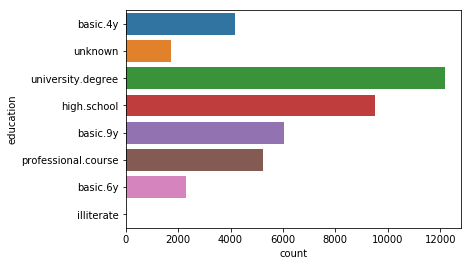

In [24]:
ax = sns.countplot(y='education', data=bank_df)

Aggregate all basic education into one category

In [30]:
bank_df['education'] = np.where(bank_df['education']=='basic.4y', 'basic', bank_df['education'])
bank_df['education'] = np.where(bank_df['education']=='basic.9y', 'basic', bank_df['education'])
bank_df['education'] = np.where(bank_df['education']=='basic.6y', 'basic', bank_df['education'])

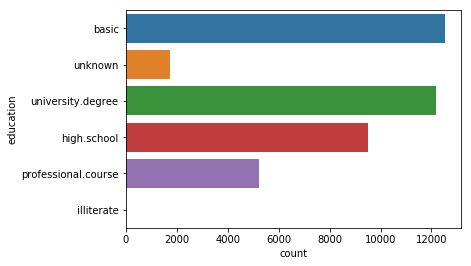

In [31]:
ax = sns.countplot(y='education', data=bank_df)

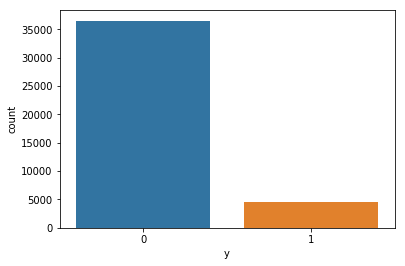

In [25]:
sns.countplot(x='y', data=bank_df)

In [26]:
bank_df.groupby('y').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
y,,,,,,,,,,
0,39.911185,220.844807,2.633085,984.113878,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
1,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991


In [33]:
edu_df = pd.get_dummies(bank_df['education'], prefix='edu')

In [37]:
edu_df.head()

,edu_basic,edu_high.school,edu_illiterate,edu_professional.course,edu_university.degree,edu_unknown
0,1,0,0,0,0,0
1,0,0,0,0,0,1
2,0,0,0,0,1,0
3,0,1,0,0,0,0
4,1,0,0,0,0,0


In [39]:
cat_cols = [\
'job',
'marital',
'education',             
'default',           
'housing',             
'loan',                
'contact',          
'month',                
'day_of_week',
'poutcome' ]     
